# Unidad 4:  Hipótesis y correlación - Sesión 1


## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo `nations.csv`. _warning_: va a encontrar un error en el formato ¿Cómo lo podemos solucionar?.


* La base de datos contiene información a nivel mundial sobre demografía:
    * `country`: País.
    * `region`: Continente del país.
    * `gdp`: Producto Interno Bruto per cápita, precios 2005.
    * `school`: Promedio años de escolaridad.
    * `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    * `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
    * `life`: Esperanza de vida al nacer.
    * `pop`: Población total.
    * `urban`: Porcentaje de población urbana.
    * `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
    * `literacy`: Tasa de alfabetismo.
    * `co2`: Toneladas de Co2 mitidas per cápita.
    * `gini`: Coeficiente de desigualdad del ingreso.


* Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
* Apellidos desde la M hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.













In [1]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización

import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos    

In [2]:
df_nations = pd.read_csv('nations.csv',encoding = "ISO-8859-1") #solución para CSV en otro lenguaje
df_nations = df_nations.drop('Unnamed: 0', 1)
df_nations.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


## Ejercicio 2:A continuación se presenta una serie de gráficos construídos con `matplotlib`. Se le pide refactorizarlos utilizando `seaborn`.
* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.



```python
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')
```


![png](gfx/activities-w4_4_0.png)



```python
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
        
grouped_boxplot(df, 'adfert', 'region')
```


![png](gfx/activities-w4_5_0.png)


```python
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')
```


![png](gfx/activities-w4_7_0.png)

In [3]:
df_nations['femlab_sep'] = np.where(df_nations['femlab'] > np.mean(df_nations['femlab']), 1, 0)

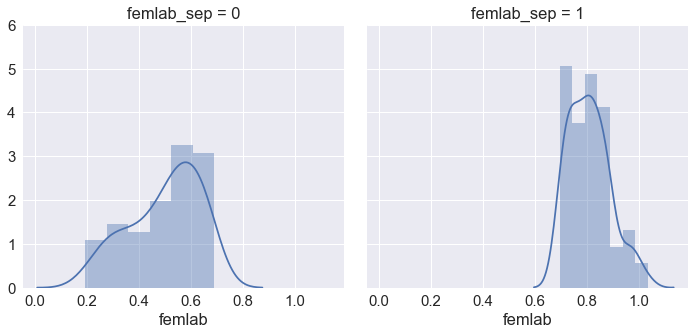

In [4]:
sns.set(font_scale=1.5)
df_nations_grid = sns.FacetGrid(df_nations, col="femlab_sep", col_wrap = 2,ylim=(0,6),size=5)
axes = df_nations_grid.axes.flatten()
df_nations_grid = df_nations_grid.map(sns.distplot, "femlab")

Vemos de los histogramas de femlab, que en los países bajo la media (graf izquierda) la varianza es mas alta, con mayor kurtosis, especialmente en la cola izquierda --> hay bastantes paises que tienen participación laboral femenina muy baja.

No así los países con femlab sobre la media. Que los datos tienden a agruparse mas cerca de la media, y menos en las colas

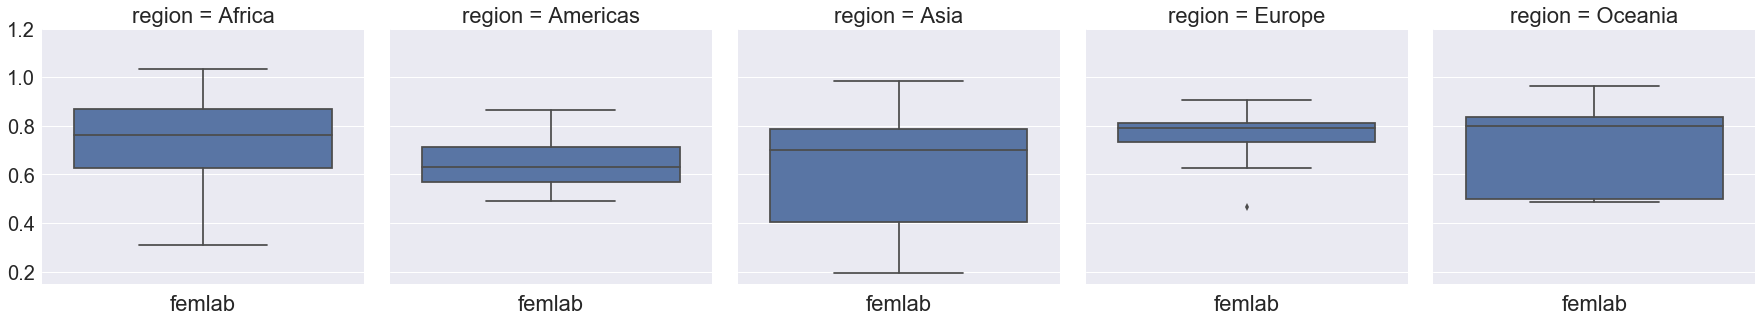

In [5]:
sns.set(font_scale=2.0)
df_nations_grid = sns.FacetGrid(df_nations, col="region",ylim=(0.15,1.2),size=5)
axes = df_nations_grid.axes.flatten()
df_nations_grid = df_nations_grid.map(sns.boxplot, "femlab", orient='v')

In [6]:
df_nations.loc[df_nations['femlab']==df_nations['femlab'][df_nations['region']=='Africa'].max(), "country"]

4    Burundi
Name: country, dtype: object

es el pais con maximo nivel de femlab

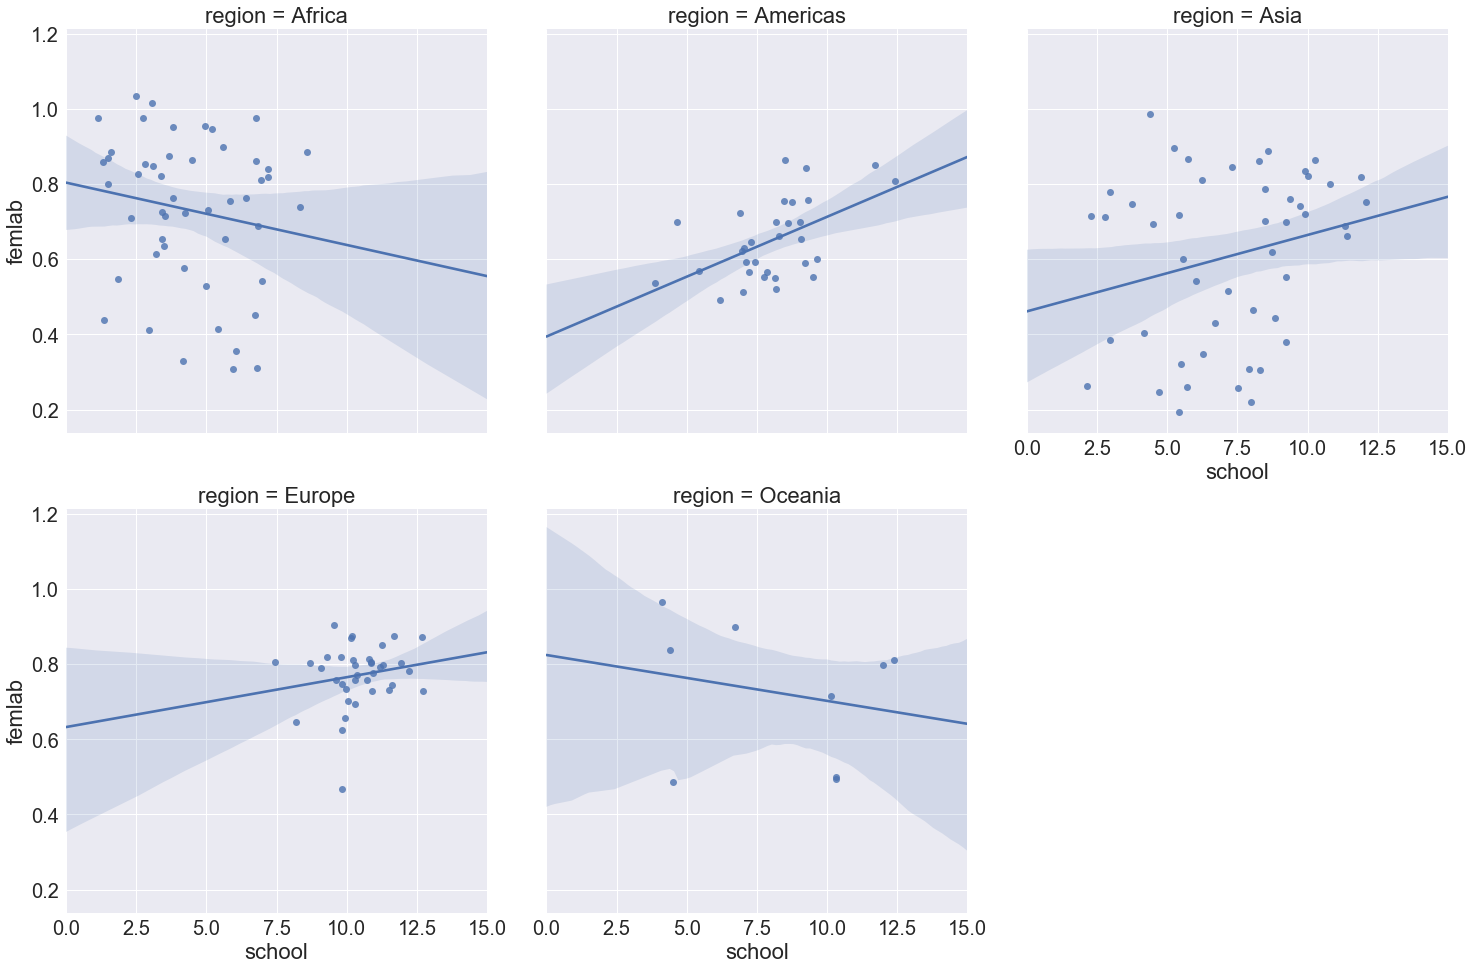

In [7]:
sns.set(font_scale=2)
df_nations_grid = sns.FacetGrid(df_nations, col="region",xlim=(0,15),col_wrap=3,size=7)
df_nations_grid = df_nations_grid.map(sns.regplot,'school','femlab')

## Ejercicio 3: Genere un heatmap entre todas las variables.
* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

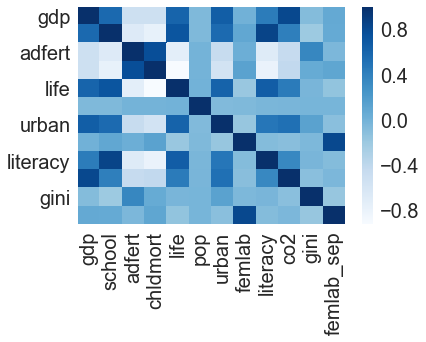

In [8]:
corr_mat = df_nations.corr()
sns.heatmap(corr_mat, cmap='Blues');

__las correlaciones por sobre +0.6 son __
(adfert,school), (childmort,school), (life,gdp), (life,school),(life,adfert), (life,childmort), (urban,gdp), (urban,life), (urban, pop), (literacy, school),(literacy,adfert),(literacy,childmort) y (literacy,life)

## Ejercicio 4: En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones
* _tip_: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = `df.loc[:,['variables', 'a', 'agregar']]`. No olvide agregar la variable `region`.
* _tip_: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

In [9]:
df_nuevo_objeto = df_nations.loc[:,['region','country','literacy', 'pop','school','urban','adfert','chldmort','gdp',
                                    'life']]
df_nuevo_objeto = df_nuevo_objeto.dropna()
df_nuevo_objeto.head(4)

,region,country,literacy,pop,school,urban,adfert,chldmort,gdp,life
0,Africa,Algeria,72.599998,34172236,6.716667,64.933334,7.300000,34.75,7300.399902,72.316666
1,Africa,Benin,41.700001,8237634,3.100000,41.000000,111.699997,122.75,1338.800049,54.733334
2,Africa,Botswana,84.099998,1941233,8.600000,59.250000,52.099998,60.25,12307.400391,52.250000
3,Africa,Burkina Faso,23.600000,15308383,1.300000,23.583334,124.800003,170.50,1063.400024,53.783333


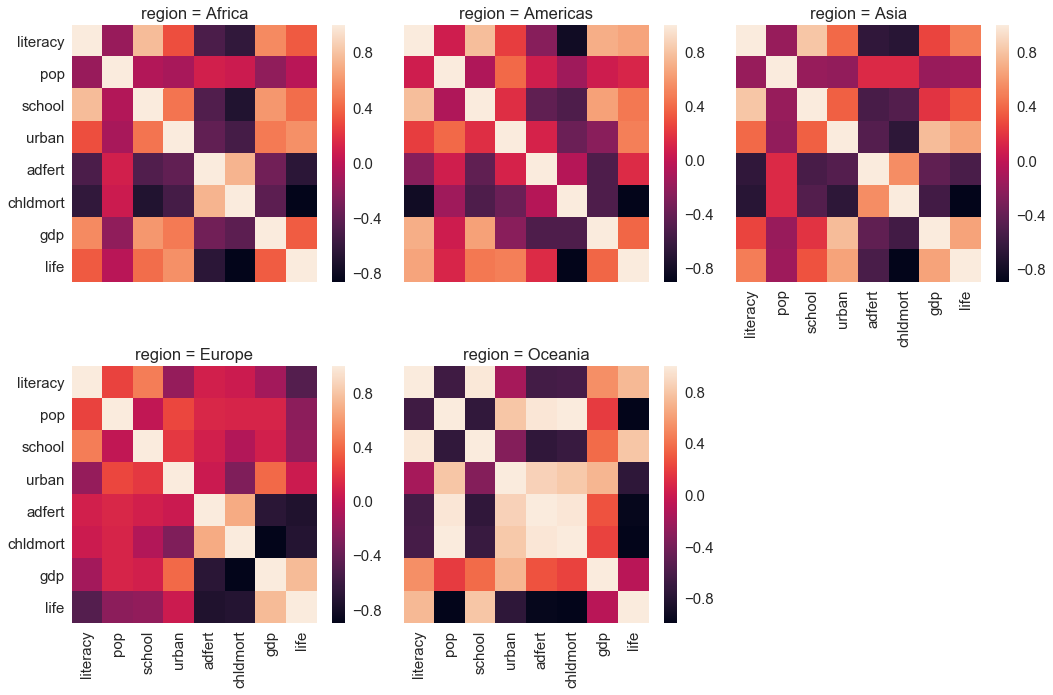

In [13]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(df_nuevo_objeto, col='region',size=5,col_wrap=3)
g.map_dataframe(lambda data,color: sns.heatmap(data.corr(), linewidths=0));

"mortalidad infantil" , "fertilidad adolescente" estan altamente correlacionadas, transversalmente por región, con las medidas de desarrollo humano. 

Es interesante destacar que en Europa son menores las correlaciones que en las otras regiones. Mi teoria es que estan a un nivel de desarrollo tan alto, que los movimientos de esas variables deben ser de menor magnitud, se "disfumina" la relacion estadistica